### Two node Network analysis

This notebook demonstrates analysis of 2-node network

#### Data
The data used was a data set of 18 women observed over a nine-month period. During that period, various subsets of these women had met in a series of 14 informal social events. The data recored which women met for which events. The data is originally from Davis, Gardner and Gardner (1941) via UCINET

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,10)

#### Load Networkx
Networkx package has a function to create the graph 

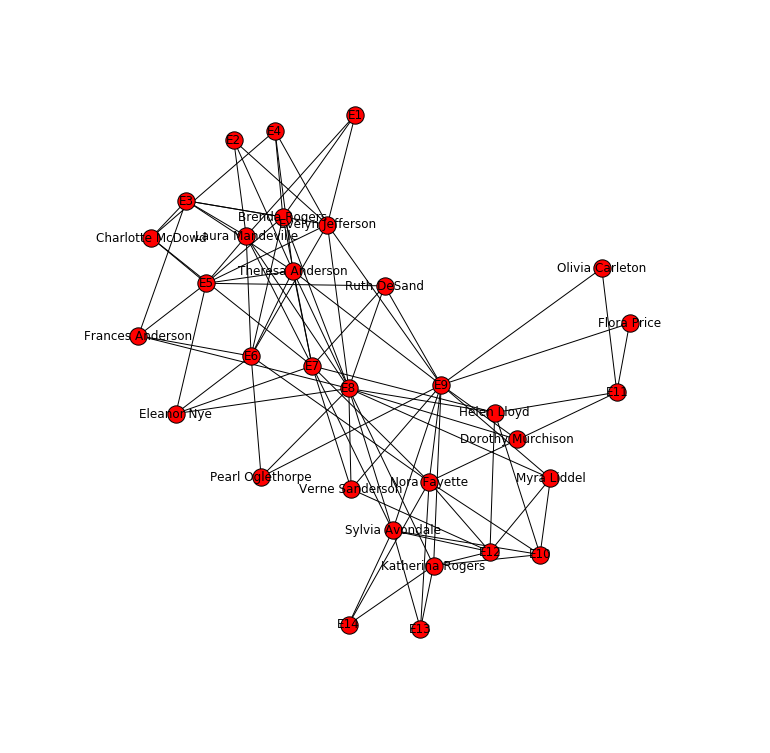

In [2]:
G = nx.davis_southern_women_graph()
nx.draw(G,with_labels=True,font_size=12)

In order to visualize the graph better let's divide the node by their type, i.e persons and events

In [3]:
node_type=nx.get_node_attributes(G, 'bipartite')
persons=[key for key,value in node_type.items() if value==0]
events=[key for key,value in node_type.items() if value==1]


Now, let's draw the graph with different color for different node type

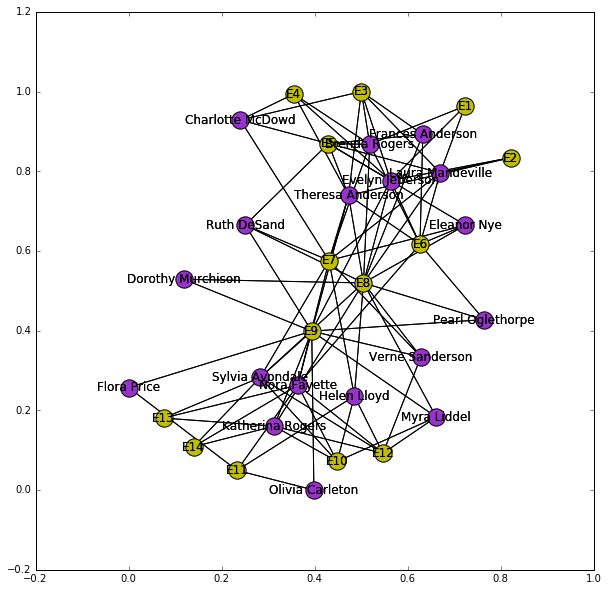

In [4]:
pos=nx.spring_layout(G)
nx.draw_networkx(G,with_labels=True,pos=pos,font_size=12,nodelist=persons,node_color='darkorchid')
nx.draw_networkx(G,with_labels=True,pos=pos,font_size=12,nodelist=events,node_color='y')

Let's analyze the relationship between women by checking the common events that they attended. We could generate a graph that denotes the relations as weight of the edge.

In [5]:
person_net=bi.weighted_projected_graph(G,persons,ratio=False)

Lets visualize the relationship between the women 

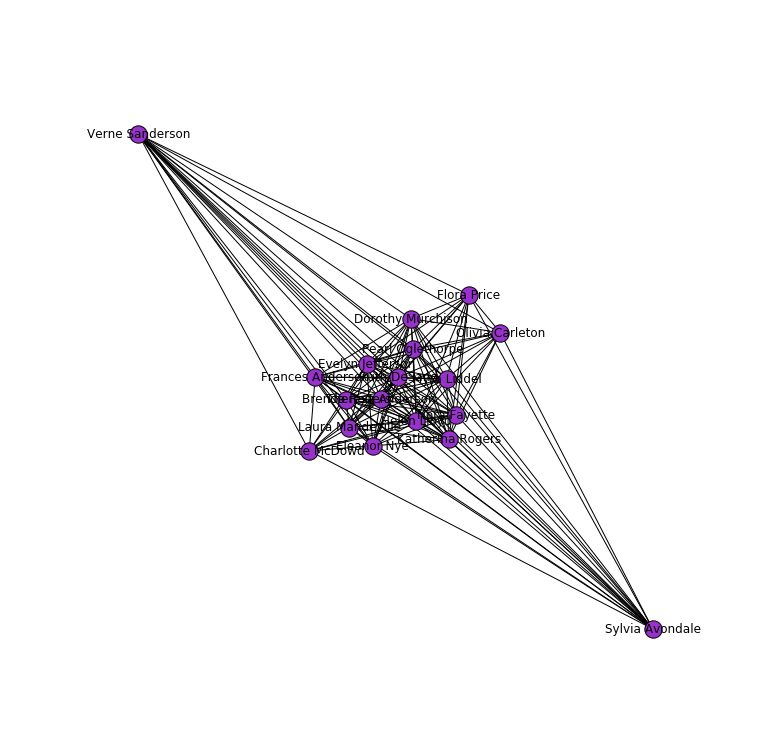

In [6]:

nx.draw(person_net,with_labels=True,node_color='darkorchid')

We could see that this is a highly connected network. Let's check degree of each person

In [7]:
print bi.weighted_projected_graph(G,persons,ratio=True).degree()

{'Theresa Anderson': 17, 'Helen Lloyd': 17, 'Flora Price': 12, 'Katherina Rogers': 16, 'Nora Fayette': 17, 'Sylvia Avondale': 17, 'Verne Sanderson': 17, 'Olivia Carleton': 12, 'Eleanor Nye': 15, 'Brenda Rogers': 15, 'Frances Anderson': 15, 'Dorothy Murchison': 16, 'Evelyn Jefferson': 17, 'Laura Mandeville': 15, 'Ruth DeSand': 17, 'Charlotte McDowd': 11, 'Myra Liddel': 16, 'Pearl Oglethorpe': 16}


The degree of each person is high. There are 7 women who knew the entire group (i.e degree 17).

Let's visualize the relationship by color coding the weight between two people to see which people are more closely connected.

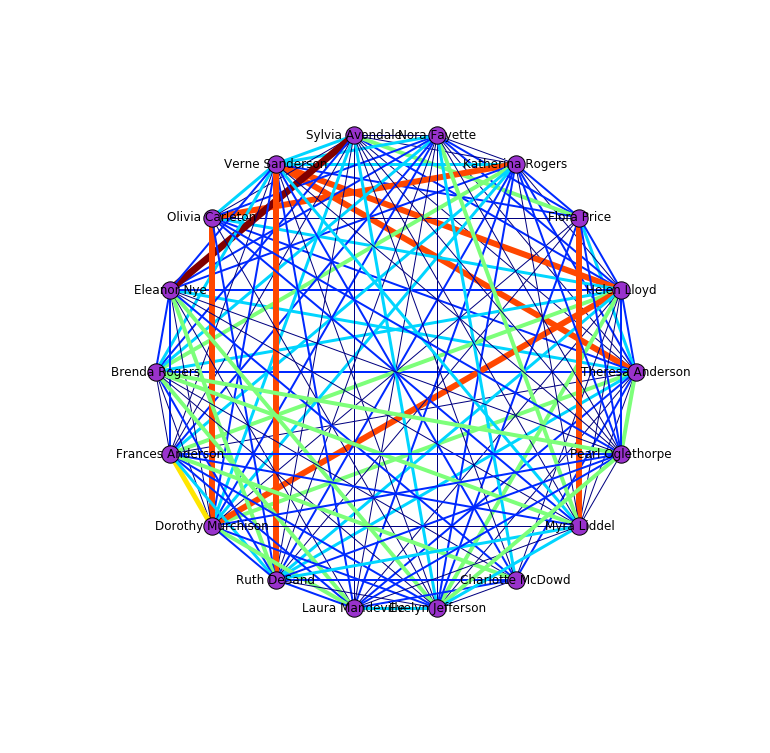

In [8]:
person_weight=nx.get_edge_attributes(person_net, 'weight').values()

nx.draw(person_net,with_labels=True,edge_color=person_weight,pos=nx.shell_layout(person_net),
        width=person_weight,node_color='darkorchid')

Now, let's visualize relationship between events by checking the common attendees.

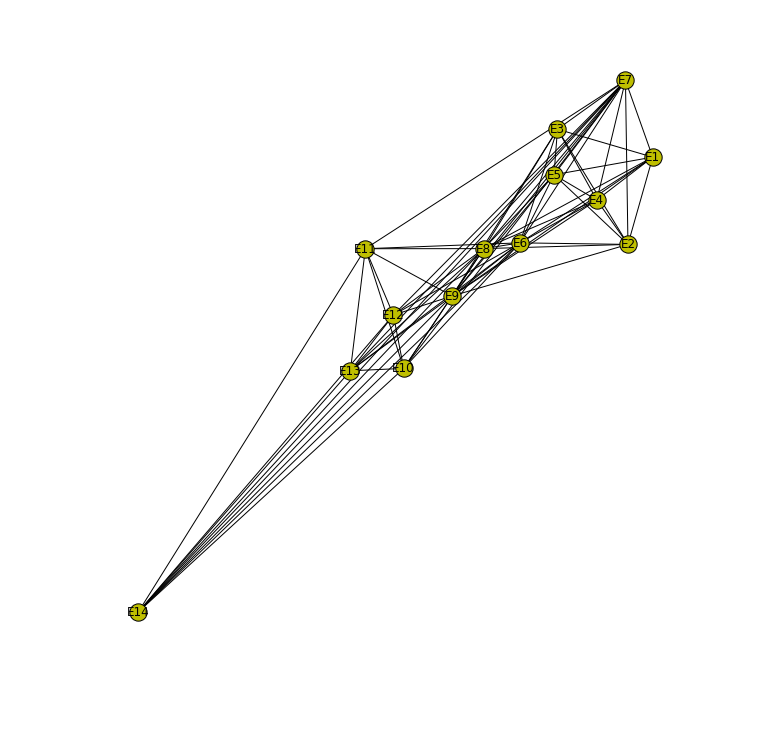

In [9]:
event_net=bi.weighted_projected_graph(G,events,ratio=False)
nx.draw(event_net,with_labels=True,node_color='y')

We could look at the weight of the edge between two events to get a indication of how similar those two events are. Let's make the node size propotional to number of people attended to get idea of attendence. 

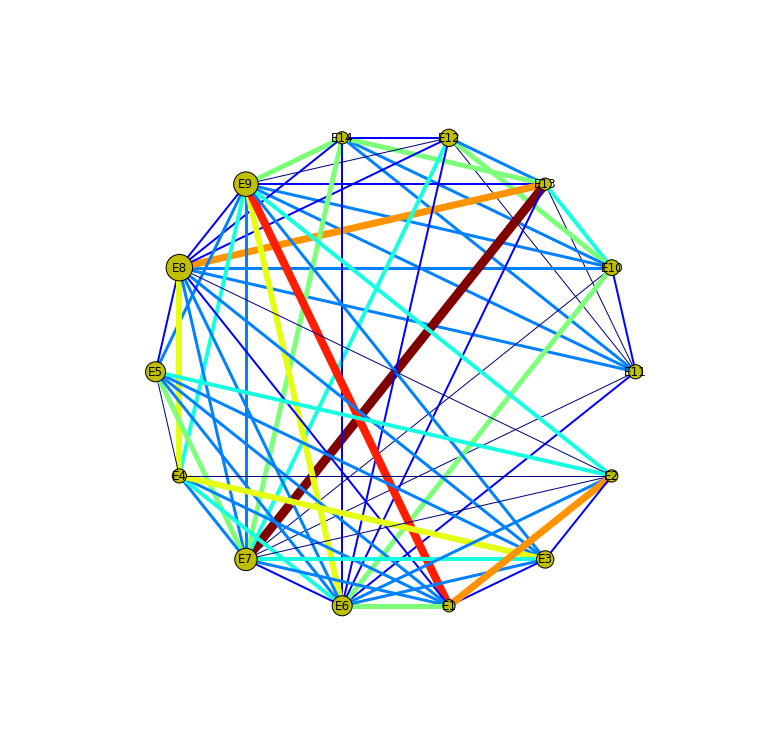

In [10]:
event_weight=nx.get_edge_attributes(event_net, 'weight').values()
event_attendence=nx.degree(G,events)
node_sz=[x*50 for x in event_attendence.values()]

nx.draw(event_net,with_labels=True,edge_color=event_weight,pos=nx.shell_layout(event_net),
        width=event_weight,node_color='y',node_size=node_sz)

The graph indicates that events E13 and E7, E9 and E1, E1 and E2 and E8 and E13 are very similar. Events E2 and E11 appears to be disconnected as there are no common attendee for these events. 

#### Conclusion
Even the dataset didn't provide any details between the 18 women, by analyzing the events attended by the women we could infer the relationship between the women. Out of 18 women, 7 women knew every other women in the group and each one knew at least 11 others.

Similar even though we didn't have data on relationship between events by analyzing attendees we could infer the relationship. Based on the network analysis we could infere that events E13 and E7, E9 and E1, E1 and E2 and E8 and E13 are very similar. Events E2 and E11 appears to be disconnected as there are no common attendee for these events. 